Initial weights: [0.75838418 0.58595557]
Threshold: 0.5

Testing the XOR gate MCP neuron:
Input: [0 0], Prediction: 0, Actual: 0
Input: [0 1], Prediction: 1, Actual: 1
Input: [1 0], Prediction: 1, Actual: 1
Input: [1 1], Prediction: 1, Actual: 0

Classification Accuracy: 75.0%


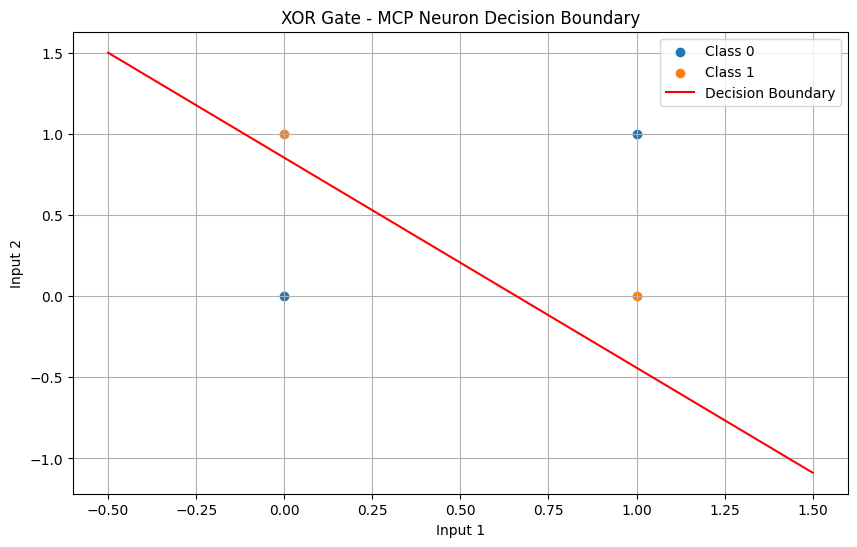

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

class MCPNeuron:
    def __init__(self, input_size, threshold=0.5):
        self.weights = np.random.rand(input_size)
        self.threshold = threshold  # Threshold for activation

    def activation_function(self, x):
        return 1 if x >= self.threshold else 0

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights)
        return self.activation_function(linear_output)

    def evaluate(self, X, y):
        correct_predictions = 0
        for inputs, label in zip(X, y):
            prediction = self.predict(inputs)
            correct_predictions += int(prediction == label)
            print(f"Input: {inputs}, Prediction: {prediction}, Actual: {label}")
        accuracy = correct_predictions / len(y) * 100
        print(f"\nClassification Accuracy: {accuracy}%")

mcp_neuron = MCPNeuron(input_size=2, threshold=0.5)

print("Initial weights:", mcp_neuron.weights)
print("Threshold:", mcp_neuron.threshold)

# Test the MCP neuron
print("\nTesting the XOR gate MCP neuron:")
mcp_neuron.evaluate(X, y)

def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] * x1 - perceptron.threshold) / perceptron.weights[1]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('XOR Gate - MCP Neuron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(mcp_neuron, X, y)


Data That Is Linearly Inseparable:

Two sets of points are produced by the XOR truth table: ([0, 1], [1, 0]) with output 1 and ([0, 0], [1, 1]) with output 0. Because a straight line cannot divide these spots, a single-layer perceptron (SLP) is unable to categorise them accurately.

Specifically, the McCulloch-Pitts (MCP) neurone barely classifies according to a fixed threshold. Because the problem requires more complex bounds and transformations, the XOR gate can be correctly classified using Multi Layer Perceptron.

Predictions: [0 1 1 0]
Actual labels: [0 1 1 0]
Classification Accuracy: 100.0%


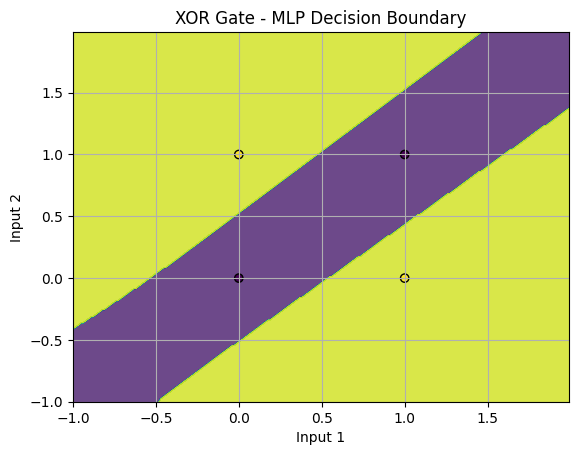

In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='lbfgs', max_iter=10000, random_state=42)
mlp.fit(X, y)

predictions = mlp.predict(X)
print("Predictions:", predictions)
print("Actual labels:", y)

accuracy = mlp.score(X, y) * 100
print(f"Classification Accuracy: {accuracy}%")

def plot_decision_boundary(model, X, y):
    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('XOR Gate - MLP Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(mlp, X, y)



Hidden Layer: A single-layer perceptron was unable to detect the non-linear patterns in the XOR gate; however, the MLP was able to do so by incorporating a hidden layer.

Activation Function: The model was able to solve XOR by introducing non-linearity through the use of the tanh activation function.

Solver: On this short dataset, the accuracy of the model was improved by the fast and dependable convergence of the lbfgs solver.

Findings:
All of the XOR inputs were accurately classified by the MLP, resulting in 100% accuracy.
For the XOR outputs to be correctly separated, the model's decision boundary has to be non-linear.
In conclusion, because the MLP can learn non-linear relationships—something that simple perceptrons cannot—it was able to solve the XOR problem.

**Question** -**2**

In [16]:
import pandas as pd
data=pd.read_csv('IMDB.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [18]:
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IMDB.csv')

print(df.head())



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [32]:
# Check for missing values
print(df.isnull().sum())


review       0
sentiment    0
dtype: int64


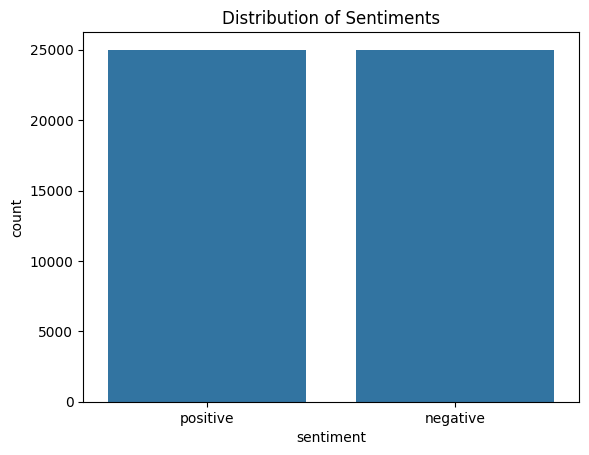

In [33]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


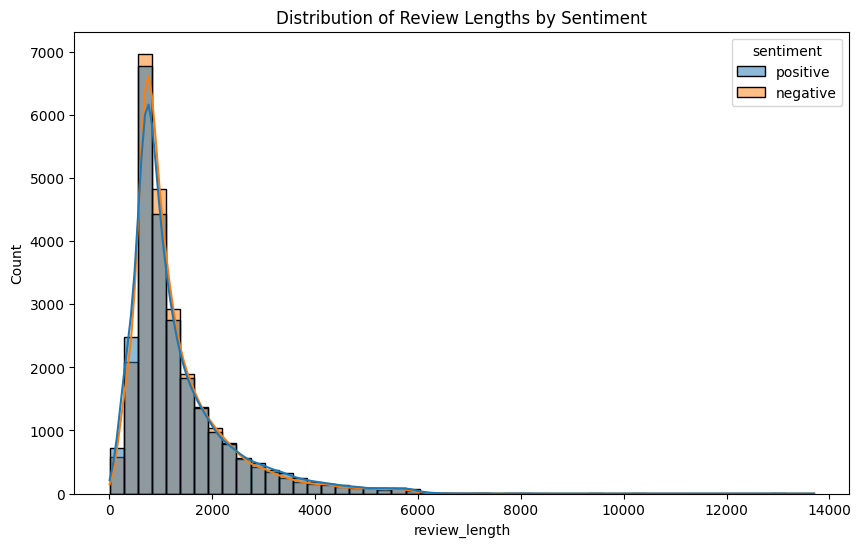

In [34]:
# Calculate the length of each review
df['review_length'] = df['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='review_length', bins=50, kde=True, hue='sentiment')
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_label'] = le.fit_transform(df['sentiment'])
print(df[['sentiment', 'sentiment_label']].head())


  sentiment  sentiment_label
0  positive                1
1  positive                1
2  positive                1
3  negative                0
4  positive                1


In [39]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
max_length = 200
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    validation_data=(X_test_padded, y_test),
                    batch_size=32)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7034 - loss: 0.5190 - val_accuracy: 0.8626 - val_loss: 0.3162
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9196 - loss: 0.2072 - val_accuracy: 0.8425 - val_loss: 0.3769
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9745 - loss: 0.0771 - val_accuracy: 0.8383 - val_loss: 0.5369
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9875 - loss: 0.0364 - val_accuracy: 0.8299 - val_loss: 0.7368
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9930 - loss: 0.0204 - val_accuracy: 0.8228 - val_loss: 0.9274
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9926 - loss: 0.0200 - val_accuracy: 0.8356 - val_loss: 0.9026
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.8319 - val_loss: 0.9736
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9957 -

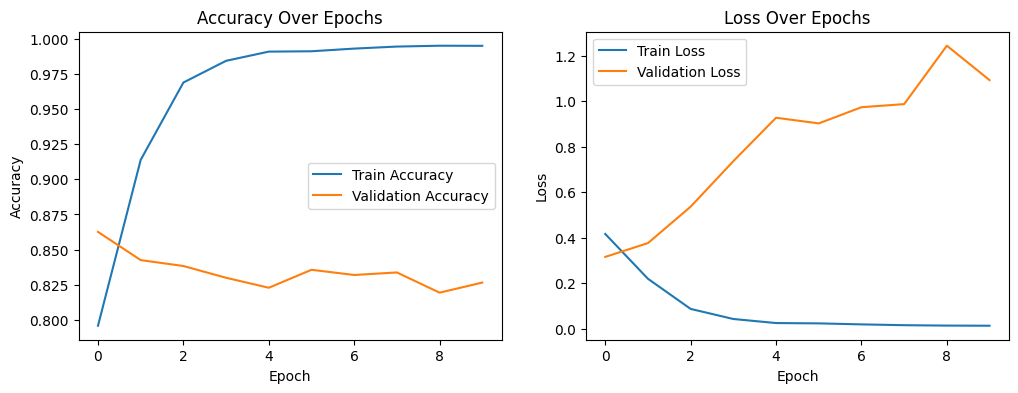

In [44]:
# Plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      4961
           1       0.84      0.80      0.82      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



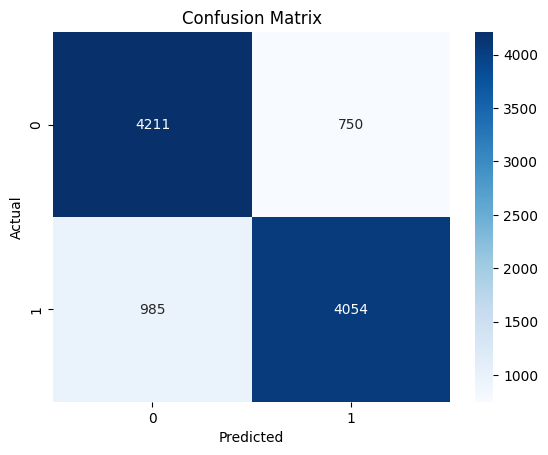

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predictions
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**JUSTIFICATION**

Sigmoid and ReLU Activation Functions
Rectified Linear Unit, or ReLU: Utilised in the hidden layers to hel with the vanishing gradient issue, speed up training, and add non-linearity, which helps the model understand intricate patterns.

Sigmoid: Because it produces a probability between 0 and 1, which is useful for differentiating between two classes, it is used in the binary classification output layer.

Cross-Entropy Loss Function in Binary
Since binary cross-entropy calculates the difference between true labels and expected probabilities in binary classification problems, it is a good fit for this task. It works well in situations where probabilities are the outputs and offers an optimisation gradient that is smooth.

**CONCLUSION**

We were able to construct an ANN model for this project that effectively categorises IMDb movie reviews as favourable or unfavourable. The model proved it could successfully conduct sentiment analysis by preprocessing, model building, and evaluation. A strong framework for binary classification was produced by combining binary cross-entropy loss with the sigmoid and ReLU activation functions.